In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')

In [3]:
df.shape

(212331, 15)

In [4]:
df.dtypes

School DBN                     object
School Name                    object
School Level                   object
Regents Exam                   object
Year                            int64
Total Tested                    int64
Mean Score                     object
Number Scoring Below 65        object
Percent Scoring Below 65       object
Number Scoring 65 or Above     object
Percent Scoring 65 or Above    object
Number Scoring 80 or Above     object
Percent Scoring 80 or Above    object
Number Scoring CR              object
Percent Scoring CR             object
dtype: object

In [5]:
# Time range should be 2014-2015 to 2016-2017 school year. Does the 'Year' column reflect this range?

print(df['Year'].min(), df['Year'].max())

2015 2017


In [6]:
# What kind of schools are included?

df['School Level'].unique()

array(['K-8', 'High school', 'Junior High-Intermediate-Middle',
       'Secondary School', 'K-12 all grades', 'Elementary'], dtype=object)

In [7]:
# Is there any missing data?

df.isna().sum()

School DBN                      0
School Name                     0
School Level                    0
Regents Exam                   10
Year                            0
Total Tested                    0
Mean Score                      0
Number Scoring Below 65         0
Percent Scoring Below 65        0
Number Scoring 65 or Above      0
Percent Scoring 65 or Above     0
Number Scoring 80 or Above      0
Percent Scoring 80 or Above     0
Number Scoring CR               0
Percent Scoring CR              0
dtype: int64

In [8]:
df[df['Regents Exam'].isna()]

School DBN                                   School Name  \
18654      84M478  Inwood Academy for Leadership Charter School   
52756      84M478  Inwood Academy for Leadership Charter School   
52757      84M478  Inwood Academy for Leadership Charter School   
100865     84M478  Inwood Academy for Leadership Charter School   
100866     84M478  Inwood Academy for Leadership Charter School   
100867     84M478  Inwood Academy for Leadership Charter School   
138300     84M478  Inwood Academy for Leadership Charter School   
138301     84M478  Inwood Academy for Leadership Charter School   
209785     84M478  Inwood Academy for Leadership Charter School   
209786     84M478  Inwood Academy for Leadership Charter School   

            School Level Regents Exam  Year  Total Tested Mean Score  \
18654   Secondary School          NaN  2015            90       55.6   
52756   Secondary School          NaN  2015            81       55.9   
52757   Secondary School          NaN  2015             9       53.4   
100865  Secondary School          NaN  2015             5          s   
100866  Secondary School          NaN  2015            54       57.4   
100867  Secondary School          NaN  2015            31          s   
138300  Secondary School          NaN  2015            54       57.3   
138301  Secondary School          NaN  2015            36       53.2   
209785  Secondary School          NaN  2015            12         59   
209786  Secondary School          NaN  2015            78       55.1   

       Number Scoring Below 65 Percent Scoring Below 65  \
18654                       61                     67.8   
52756                       55                     67.9   
52757                        6                     66.7   
100865                       s                        s   
100866                      34                       63   
100867                       s                        s   
138300                      34                       63   
138301                      27                       75   
209785                       9                       75   
209786                      52                     66.7   

       Number Scoring 65 or Above Percent Scoring 65 or Above  \
18654                          29                        32.2   
52756                          26                        32.1   
52757                           3                        33.3   
100865                          s                           s   
100866                         20                          37   
100867                          s                           s   
138300                         20                          37   
138301                          9                          25   
209785                          3                          25   
209786                         26                        33.3   

       Number Scoring 80 or Above Percent Scoring 80 or Above  \
18654                           6                         6.7   
52756                           5                         6.2   
52757                           1                        11.1   
100865                          s                           s   
100866                          6                        11.1   
100867                          s                           s   
138300                          5                         9.3   
138301                          1                         2.8   
209785                          1                         8.3   
209786                          5                         6.4   

       Number Scoring CR Percent Scoring CR  
18654                  0                  0  
52756                  0                  0  
52757                  0                  0  
100865                na                 na  
100866                 0                  0  
100867                na                 na  
138300                 0                  0  
138301                 0  

In [9]:
# Cleaning the data

# There are ten missing values in the 'Regents Exam' column. One school is responsible.
# We'll drop that school from the dataset

df.dropna(inplace = True)

In [10]:
# We're interested in two score columns. We'll drop the other columns.

drop_cols = ['Number Scoring Below 65', 'Percent Scoring Below 65', 'Number Scoring 65 or Above', 'Percent Scoring 65 or Above', 'Number Scoring 80 or Above', 'Number Scoring CR', 'Percent Scoring CR']

df.drop(drop_cols, axis = 1, inplace = True)

In [11]:
df.head()

School DBN                     School Name School Level  \
0     01M034  P.S. 034 Franklin D. Roosevelt          K-8   
1     01M034  P.S. 034 Franklin D. Roosevelt          K-8   
2     01M034  P.S. 034 Franklin D. Roosevelt          K-8   
3     01M140          P.S. 140 Nathan Straus          K-8   
4     01M140          P.S. 140 Nathan Straus          K-8   

          Regents Exam  Year  Total Tested Mean Score  \
0  Common Core Algebra  2017             4          s   
1   Living Environment  2015            16       77.9   
2   Living Environment  2016             9         74   
3  Common Core Algebra  2016             3          s   
4  Common Core Algebra  2017             2          s   

  Percent Scoring 80 or Above  
0                           s  
1                        43.8  
2                        22.2  
3                           s  
4                           s

In [12]:
# 'Mean Score' and 'Percent Scoring 80 or Above'

# We expect integers or floats. Instead we have objects.
# Can we convert them to floats?

# Yes, but first we have to deal with the non-numeric value 's'.
# We don't know what 's' means so let's make a subset
# then convert the scores to floats.

df = df[df['Mean Score'] != 's']
df['Mean Score'] = pd.to_numeric(df['Mean Score'])
df = df[df['Percent Scoring 80 or Above'] != 's']
df['Percent Scoring 80 or Above'] = pd.to_numeric(df['Percent Scoring 80 or Above'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137101 entries, 1 to 212325
Data columns (total 8 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   School DBN                   137101 non-null  object 
 1   School Name                  137101 non-null  object 
 2   School Level                 137101 non-null  object 
 3   Regents Exam                 137101 non-null  object 
 4   Year                         137101 non-null  int64  
 5   Total Tested                 137101 non-null  int64  
 6   Mean Score                   137101 non-null  float64
 7   Percent Scoring 80 or Above  137101 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 9.4+ MB


In [13]:
# Filter the dataset. Let's have a look at the Humanities Preparatory Academy High School in Chelsea

df[df['School DBN'] == '02M605'].sort_values(by = ['Year'])

School DBN                     School Name School Level  \
148870     02M605  Humanities Preparatory Academy  High school   
2224       02M605  Humanities Preparatory Academy  High school   
107118     02M605  Humanities Preparatory Academy  High school   
107117     02M605  Humanities Preparatory Academy  High school   
148869     02M605  Humanities Preparatory Academy  High school   
59860      02M605  Humanities Preparatory Academy  High school   
148861     02M605  Humanities Preparatory Academy  High school   
148860     02M605  Humanities Preparatory Academy  High school   
107114     02M605  Humanities Preparatory Academy  High school   
2222       02M605  Humanities Preparatory Academy  High school   
59854      02M605  Humanities Preparatory Academy  High school   
23480      02M605  Humanities Preparatory Academy  High school   
23479      02M605  Humanities Preparatory Academy  High school   
107113     02M605  Humanities Preparatory Academy  High school   
59857      02M605  Humanities Preparatory Academy  High school   
107116     02M605  Humanities Preparatory Academy  High school   
2223       02M605  Humanities Preparatory Academy  High school   
148864     02M605  Humanities Preparatory Academy  High school   
148865     02M605  Humanities Preparatory Academy  High school   
148866     02M605  Humanities Preparatory Academy  High school   
148867     02M605  Humanities Preparatory Academy  High school   
107115     02M605  Humanities Preparatory Academy  High school   

               Regents Exam  Year  Total Tested  Mean Score  \
148870              English  2015            33        74.8   
2224                English  2015            65        74.1   
107118              English  2015            31        71.8   
107117              English  2015            34        76.3   
148869              English  2015            25        75.3   
59860               English  2015            49        73.3   
148861  Common Core English  2016            22        75.4   
148860  Common Core English  2016            10        70.0   
107114  Common Core English  2016            15        68.8   
2222    Common Core English  2016            38        74.2   
59854   Common Core English  2016            22        76.8   
23480   Common Core English  2016             8        71.9   
23479   Common Core English  2016            30        74.9   
107113  Common Core English  2016            23        77.8   
59857   Common Core English  2017            45        77.5   
107116  Common Core English  2017            27        78.9   
2223    Common Core English  2017            63        77.8   
148864  Common Core English  2017             6        76.7   
148865  Common Core English  2017            16        78.6   
148866  Common Core English  2017            34        76.9   
148867  Common Core English  2017             7        81.1   
107115  Common Core English  2017            36        77.0   

        Percent Scoring 80 or Above  
148870                         24.2  
2224                           30.8  
107118                         25.8  
107117                         35.3  
148869                         40.0  
59860                          26.5  
148861                         36.4  
148860                         30.0  
107114                         13.3  
2222                           36.8  
59854                          45.5  
23480                          25.0  
23479                          40.0  
107113                         52.2  
59857                          55.6  
107116                         66.7  
2223                           54.0  
148864                         50.0  
148865                         50.0  
148866                         52.9  
148867                         71.4  
107115                         44.4

In [14]:
# How did this school perform over three years?

df[df['School DBN'] == '02M605'].groupby(['Year'])['Mean Score'].mean()

Year
2015    74.266667
2016    73.725000
2017    78.062500
Name: Mean Score, dtype: float64

In [15]:
# Other high schools in Manhattan

df[(df['School DBN'] != '02M605')
   & (df['School Level'] == 'High school')
   & (df['School DBN'].str.contains('M'))
   & (df['Regents Exam']).str.contains('English')
  ].groupby(['Year'])['Mean Score'].mean()

Year
2015    70.562738
2016    70.612695
2017    72.814383
Name: Mean Score, dtype: float64

In [16]:
# Other high schools in other boroughs

df[(df['School DBN'] != '02M605')
   & (df['School Level'] == 'High school')
   & (~df['School DBN'].str.contains('M'))
   & (df['Regents Exam']).str.contains('English')
  ].groupby(['Year'])['Mean Score'].mean()

Year
2015    67.399191
2016    65.028724
2017    67.557191
Name: Mean Score, dtype: float64

<AxesSubplot:>

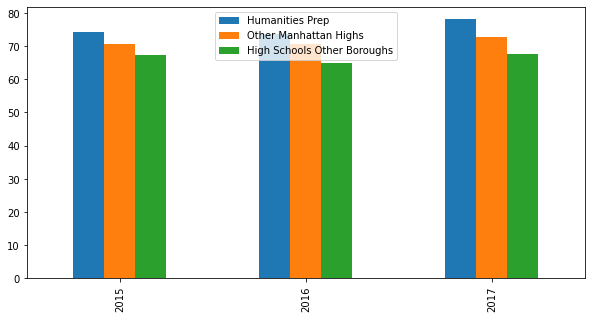

In [17]:
# Visualization

# Dictionary made by manually entering data from three previous cells.
# I wish I knew how to do this programmatically.

d = {'Humanities Prep': [74.266667, 73.725000, 78.062500],
     'Other Manhattan Highs': [70.562738, 70.612695, 72.814383],
     'High Schools Other Boroughs': [67.399191, 65.028724, 67.557191]}
new_df = pd.DataFrame(data = d, index = ['2015', '2016', '2017'])
new_df.plot(kind = 'bar', figsize = (10, 5))

In [29]:
# a more elegant way to create the dictionary

test0 = df[df['School DBN'] == '02M605'].groupby(['Year'])['Mean Score'].mean()
test1 = df[(df['School DBN'] != '02M605')
   & (df['School Level'] == 'High school')
   & (df['School DBN'].str.contains('M'))
   & (df['Regents Exam']).str.contains('English')
  ].groupby(['Year'])['Mean Score'].mean()
test2 = df[(df['School DBN'] != '02M605')
   & (df['School Level'] == 'High school')
   & (~df['School DBN'].str.contains('M'))
   & (df['Regents Exam']).str.contains('English')
  ].groupby(['Year'])['Mean Score'].mean()

In [31]:
# 3 dictionaries to 3 dataframes

dict0 = pd.DataFrame.from_dict(test0)
dict1 = pd.DataFrame.from_dict(test1)
dict2 = pd.DataFrame.from_dict(test2)


In [51]:
# join dataframes dict0 and dict1

temp = dict0.join(dict1, lsuffix='_Humanities_Prep', rsuffix='_Other_Manhattan_Highs')

# join temp and dict2

newest_df = temp.join(dict2)

# rename last column

newest_df = newest_df.rename(columns = {'Mean Score': 'High Schools Other Boroughs'})

<AxesSubplot:xlabel='Year'>

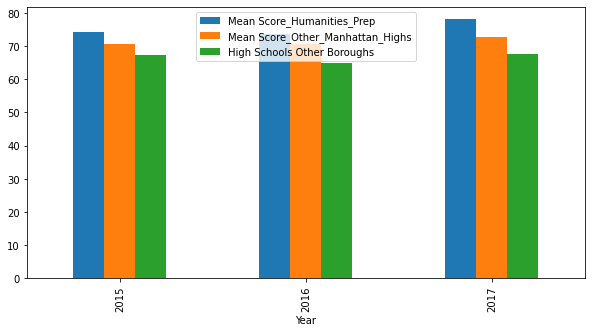

In [53]:
# Visualization 2

newest_df.plot(kind = 'bar', figsize = (10, 5))

In [18]:
# Conclusions

# We lost a lot of data from the dataset by dropping the 's' values. Maybe we should have done mean imputation.
# Humanities Prep Academy scored higher in the English Regents exam than other high schools in Manhattan
# and higher than schools in other boroughs, for every year surveyed.